In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

In [20]:
# Генерація масиву
N, M = 15, 15
A = np.random.randint(3, 100, size=(N, M))

A

array([[70,  6, 29, 36, 87, 81, 52, 91, 78, 56, 71, 96, 37, 89, 54],
       [15, 48, 86, 62, 58, 91, 73, 41,  4, 21, 64, 25, 13, 63, 28],
       [17, 75, 69, 24, 29, 91, 70, 49, 54, 19, 65, 15, 39, 40, 18],
       [ 3, 37, 31, 55, 25, 23, 26, 98, 97, 87, 12, 98, 95, 79, 52],
       [ 6, 68,  8, 78, 41, 71, 62, 13,  3, 84, 56, 29, 53, 29, 19],
       [33, 94, 44, 13, 50, 83, 32, 37, 49, 72, 32, 41, 66, 81, 99],
       [57, 43, 77, 48, 71, 67, 15, 43, 52, 37, 37, 47, 66, 61,  7],
       [85, 23, 66, 59, 67, 45, 49, 87, 97, 40, 13, 68, 91, 58, 97],
       [83, 40, 45, 43, 81, 85, 70,  9, 75, 53, 23, 20, 73, 23,  7],
       [29, 61, 58, 88, 71, 32, 97, 48, 85, 44, 66, 11, 28,  6, 18],
       [10, 88, 24, 87, 10, 48, 66, 59, 48, 85, 87, 76, 35, 85, 41],
       [97, 58, 95, 46, 23, 24,  3, 46, 84,  3, 39, 76, 60, 66, 71],
       [10, 94, 32, 99, 95,  6, 49, 82, 92, 17, 20, 67, 40, 84, 74],
       [51, 45, 33, 15, 88, 34, 69, 24, 17, 58, 96, 80, 49, 92, 52],
       [66, 48, 36, 47, 70, 59, 48

In [21]:
# Функція для знаходження найближчого значення до z
def find_nearest(array, z):
    idx = (np.abs(array - z)).argmin()
    return array.flat[idx]

find_nearest(A, 4)

4

In [22]:
# Знаходження середнього значення та медіани
mean_value = np.mean(A)
median_value = np.median(A)


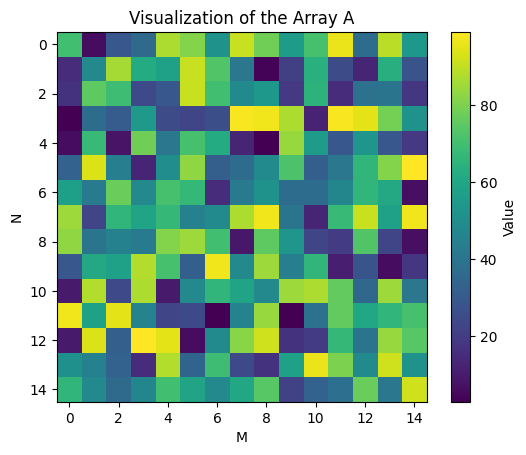

array([[70,  6, 29, 36, 87, 81, 52, 91, 78, 56, 71, 96, 37, 89, 54],
       [15, 48, 86, 62, 58, 91, 73, 41,  4, 21, 64, 25, 13, 63, 28],
       [17, 75, 69, 24, 29, 91, 70, 49, 54, 19, 65, 15, 39, 40, 18],
       [ 3, 37, 31, 55, 25, 23, 26, 98, 97, 87, 12, 98, 95, 79, 52],
       [ 6, 68,  8, 78, 41, 71, 62, 13,  3, 84, 56, 29, 53, 29, 19],
       [33, 94, 44, 13, 50, 83, 32, 37, 49, 72, 32, 41, 66, 81, 99],
       [57, 43, 77, 48, 71, 67, 15, 43, 52, 37, 37, 47, 66, 61,  7],
       [85, 23, 66, 59, 67, 45, 49, 87, 97, 40, 13, 68, 91, 58, 97],
       [83, 40, 45, 43, 81, 85, 70,  9, 75, 53, 23, 20, 73, 23,  7],
       [29, 61, 58, 88, 71, 32, 97, 48, 85, 44, 66, 11, 28,  6, 18],
       [10, 88, 24, 87, 10, 48, 66, 59, 48, 85, 87, 76, 35, 85, 41],
       [97, 58, 95, 46, 23, 24,  3, 46, 84,  3, 39, 76, 60, 66, 71],
       [10, 94, 32, 99, 95,  6, 49, 82, 92, 17, 20, 67, 40, 84, 74],
       [51, 45, 33, 15, 88, 34, 69, 24, 17, 58, 96, 80, 49, 92, 52],
       [66, 48, 36, 47, 70, 59, 48

In [23]:
# Візуалізація
plt.imshow(A, cmap='viridis')
plt.colorbar(label='Value')
plt.title('Visualization of the Array A')
plt.xlabel('M')
plt.ylabel('N')
plt.show()

A

In [24]:
# Занулення
A[2, 3] = 0
A[4, 1] = 0

A

array([[70,  6, 29, 36, 87, 81, 52, 91, 78, 56, 71, 96, 37, 89, 54],
       [15, 48, 86, 62, 58, 91, 73, 41,  4, 21, 64, 25, 13, 63, 28],
       [17, 75, 69,  0, 29, 91, 70, 49, 54, 19, 65, 15, 39, 40, 18],
       [ 3, 37, 31, 55, 25, 23, 26, 98, 97, 87, 12, 98, 95, 79, 52],
       [ 6,  0,  8, 78, 41, 71, 62, 13,  3, 84, 56, 29, 53, 29, 19],
       [33, 94, 44, 13, 50, 83, 32, 37, 49, 72, 32, 41, 66, 81, 99],
       [57, 43, 77, 48, 71, 67, 15, 43, 52, 37, 37, 47, 66, 61,  7],
       [85, 23, 66, 59, 67, 45, 49, 87, 97, 40, 13, 68, 91, 58, 97],
       [83, 40, 45, 43, 81, 85, 70,  9, 75, 53, 23, 20, 73, 23,  7],
       [29, 61, 58, 88, 71, 32, 97, 48, 85, 44, 66, 11, 28,  6, 18],
       [10, 88, 24, 87, 10, 48, 66, 59, 48, 85, 87, 76, 35, 85, 41],
       [97, 58, 95, 46, 23, 24,  3, 46, 84,  3, 39, 76, 60, 66, 71],
       [10, 94, 32, 99, 95,  6, 49, 82, 92, 17, 20, 67, 40, 84, 74],
       [51, 45, 33, 15, 88, 34, 69, 24, 17, 58, 96, 80, 49, 92, 52],
       [66, 48, 36, 47, 70, 59, 48

In [25]:
# Знаходження індексів занулених значень
zero_indices = np.where(A == 0)


# Підготувати до інтерполяції
x = np.arange(0, N, 1)
y = np.arange(0, M, 1)

# Створити функцію для інтерполяції
f = interp2d(x, y, A, kind='linear')

# Здійснити інтерполяцію
for (i, j) in zip(zero_indices[0], zero_indices[1]):
    x_new = np.array([i])
    y_new = np.array([j])
    A[i, j] = f(x_new, y_new)[0]

A

C:\Users\den\AppData\Local\Temp\ipykernel_24488\798700588.py:10: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(x, y, A, kind='linear')
C:\Users\den\AppData\Local\Temp\ipykernel_24488\798700588.py:16: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 

array([[70,  6, 29, 36, 87, 81, 52, 91, 78, 56, 71, 96, 37, 89, 54],
       [15, 48, 86, 62, 58, 91, 73, 41,  4, 21, 64, 25, 13, 63, 28],
       [17, 75, 69, 31, 29, 91, 70, 49, 54, 19, 65, 15, 39, 40, 18],
       [ 3, 37, 31, 55, 25, 23, 26, 98, 97, 87, 12, 98, 95, 79, 52],
       [ 6, 58,  8, 78, 41, 71, 62, 13,  3, 84, 56, 29, 53, 29, 19],
       [33, 94, 44, 13, 50, 83, 32, 37, 49, 72, 32, 41, 66, 81, 99],
       [57, 43, 77, 48, 71, 67, 15, 43, 52, 37, 37, 47, 66, 61,  7],
       [85, 23, 66, 59, 67, 45, 49, 87, 97, 40, 13, 68, 91, 58, 97],
       [83, 40, 45, 43, 81, 85, 70,  9, 75, 53, 23, 20, 73, 23,  7],
       [29, 61, 58, 88, 71, 32, 97, 48, 85, 44, 66, 11, 28,  6, 18],
       [10, 88, 24, 87, 10, 48, 66, 59, 48, 85, 87, 76, 35, 85, 41],
       [97, 58, 95, 46, 23, 24,  3, 46, 84,  3, 39, 76, 60, 66, 71],
       [10, 94, 32, 99, 95,  6, 49, 82, 92, 17, 20, 67, 40, 84, 74],
       [51, 45, 33, 15, 88, 34, 69, 24, 17, 58, 96, 80, 49, 92, 52],
       [66, 48, 36, 47, 70, 59, 48

In [26]:
# Нормалізувати
A_normalized = (A - np.min(A)) / (np.max(A) - np.min(A))

In [27]:
A_normalized

array([[0.69791667, 0.03125   , 0.27083333, 0.34375   , 0.875     ,
        0.8125    , 0.51041667, 0.91666667, 0.78125   , 0.55208333,
        0.70833333, 0.96875   , 0.35416667, 0.89583333, 0.53125   ],
       [0.125     , 0.46875   , 0.86458333, 0.61458333, 0.57291667,
        0.91666667, 0.72916667, 0.39583333, 0.01041667, 0.1875    ,
        0.63541667, 0.22916667, 0.10416667, 0.625     , 0.26041667],
       [0.14583333, 0.75      , 0.6875    , 0.29166667, 0.27083333,
        0.91666667, 0.69791667, 0.47916667, 0.53125   , 0.16666667,
        0.64583333, 0.125     , 0.375     , 0.38541667, 0.15625   ],
       [0.        , 0.35416667, 0.29166667, 0.54166667, 0.22916667,
        0.20833333, 0.23958333, 0.98958333, 0.97916667, 0.875     ,
        0.09375   , 0.98958333, 0.95833333, 0.79166667, 0.51041667],
       [0.03125   , 0.57291667, 0.05208333, 0.78125   , 0.39583333,
        0.70833333, 0.61458333, 0.10416667, 0.        , 0.84375   ,
        0.55208333, 0.27083333, 0.52083333, 